In [1]:
import pandas as pd
import sys
import os

path = "data/"
os.chdir(path)

#### Load data and filter columns with too many empty values

In [7]:
# dfCore = pd.read_csv('https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)
# df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)

# df1515 = pd.read_csv("Chemical_descriptors1515.csv", usecols=[0,1,3,6] + list(range (10,219)))
# df1515_PCA = pd.read_csv("Calc_results.csv", usecols=[1, 2] + list(range (3,211)))
# df1515_PCA = pd.read_csv("Chemical_descriptors_e_coli_core.csv", usecols=[1, 2] + list(range (3,211)))

#df1515 = pd.read_csv("Chemical_descriptors1515.csv", usecols= list(range (9,219)))

# dfcore = pd.read_csv("chemical_properties_e_coli_core.csv")

# df1515_PCA = pd.read_csv("Chemical_descriptors_e_coli_core.csv")

# dfCore = pd.read_csv("core_no_mass.csv")

# df1515 = pd.read_csv("Cleaned1515PrePCA.csv", index_col=0 )
# df1515_PCA = pd.read_csv("Cleaned1515PrePCA.csv", usecols=[0, 2] + list(range (3,213)))


df = pd.read_csv("1515_4_PCA.csv", index_col=0, usecols = list(range(8,216)))
# df = pd.read_csv("core_4_PCA.csv", index_col=0, usecols = list(range(7,215)))

In [11]:


print(df.shape)


(55, 207)


## Remove NANs in df1515 with 0's 

In [8]:
import numpy as np

df["BCUT2D_MWHI"] = df["BCUT2D_MWHI"].replace(np.nan, 0)

df["BCUT2D_MWLOW"] = df["BCUT2D_MWLOW"].replace(np.nan, 0)

df["BCUT2D_CHGHI"] = df["BCUT2D_CHGHI"].replace(np.nan, 0)

df["BCUT2D_LOGPHI"] = df["BCUT2D_LOGPHI"].replace(np.nan, 0)

df["BCUT2D_LOGPLOW"] = df["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df["BCUT2D_CHGLO"] = df["BCUT2D_CHGLO"].replace(np.nan, 0)

df["BCUT2D_MRHI"] = df["BCUT2D_MRHI"].replace(np.nan, 0)

df["BCUT2D_MRLOW"] = df["BCUT2D_MRLOW"].replace(np.nan, 0)

df["MaxPartialCharge"] = df["MaxPartialCharge"].replace(np.nan, 0)

df["MinPartialCharge"] = df["MinPartialCharge"].replace(np.nan, 0)

df["MaxAbsPartialCharge"] = df["MaxAbsPartialCharge"].replace(np.nan, 0)

df["MinAbsPartialCharge"] = df["MinAbsPartialCharge"].replace(np.nan, 0)

#### Analyse the distribution of values for each descriptor

In [11]:
import matplotlib.pyplot as plt

## Plot e.coli core metabolite feature distributions


In [ ]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    dfCore.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(dfCore.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

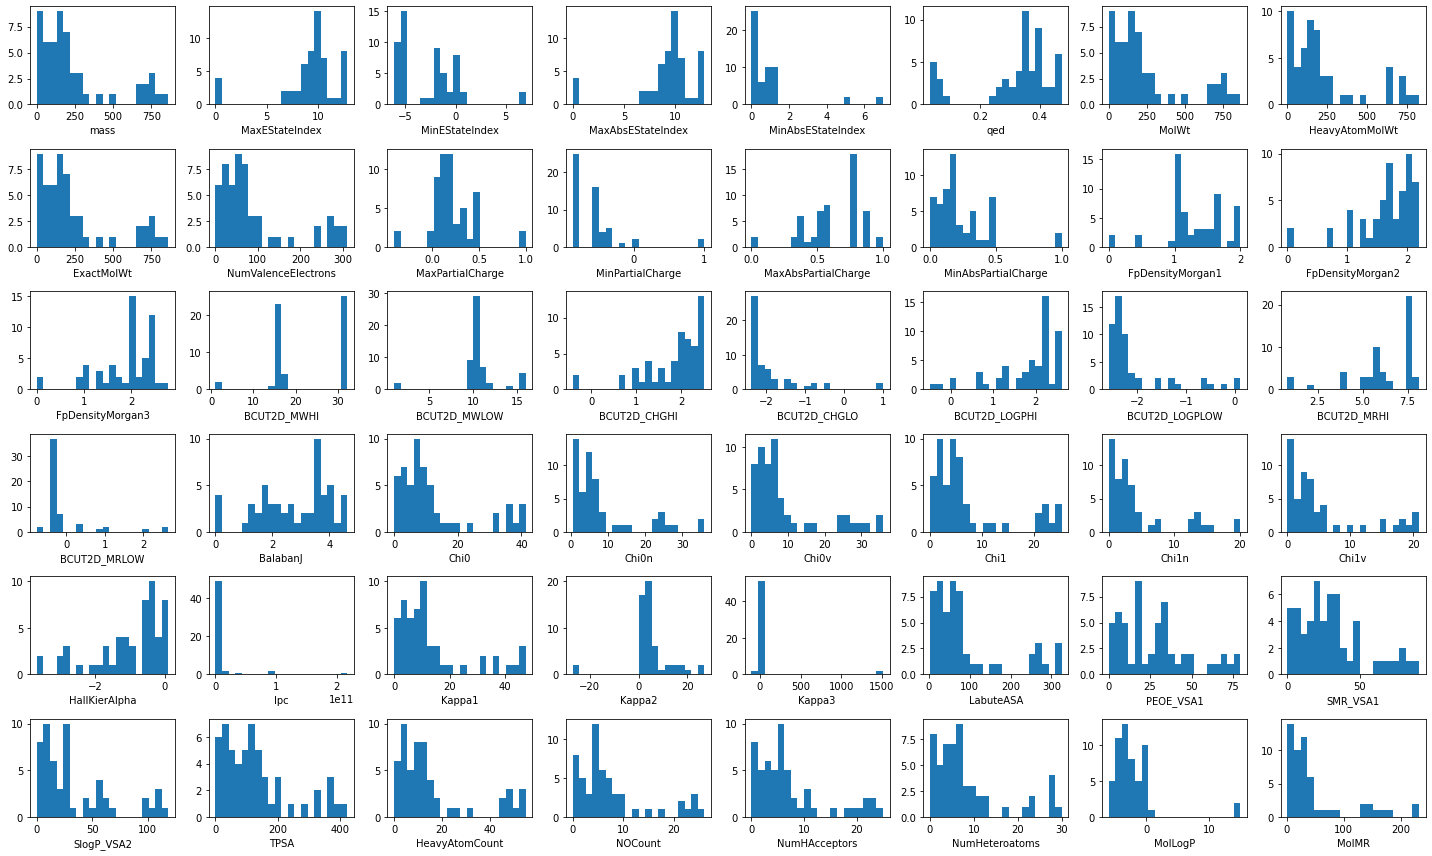

In [15]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    df1515_PCA.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(df1515_PCA.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

## Plot e.coli iML1515 metabolite feature distributions

In [ ]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(20, 20, figsize=(29, 12))
axs = axs.flatten()
title = plt.title("iML1515", loc ="center")

for i in range(48):
    df1515.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(df1515.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

#### Estimate Spearman correlation between all pairs of descriptors

In [13]:
# remove all columns that have less than 90% of non-zero entries
df = df.loc[:,((df != 0).sum() > df.shape[0] * 0.9)]

In [14]:
print(df.shape)

(55, 45)


In [9]:
from scipy.stats import spearmanr
correlation = [(d1, d2, spearmanr(df.loc[:,d1], df.loc[:,d2])[0]) for d1 in df.columns for d2 in df.columns]
# correlation = [(d1_1515, d2_1515, spearmanr(df1515.loc[:,d1_1515], df1515.loc[:,d2_1515])[0]) for d1_1515 in df1515.columns for d2_1515 in df1515.columns]

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [10]:
df_2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])
df_3 = df_2.pivot_table(index='d1', columns='d2', values='value')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


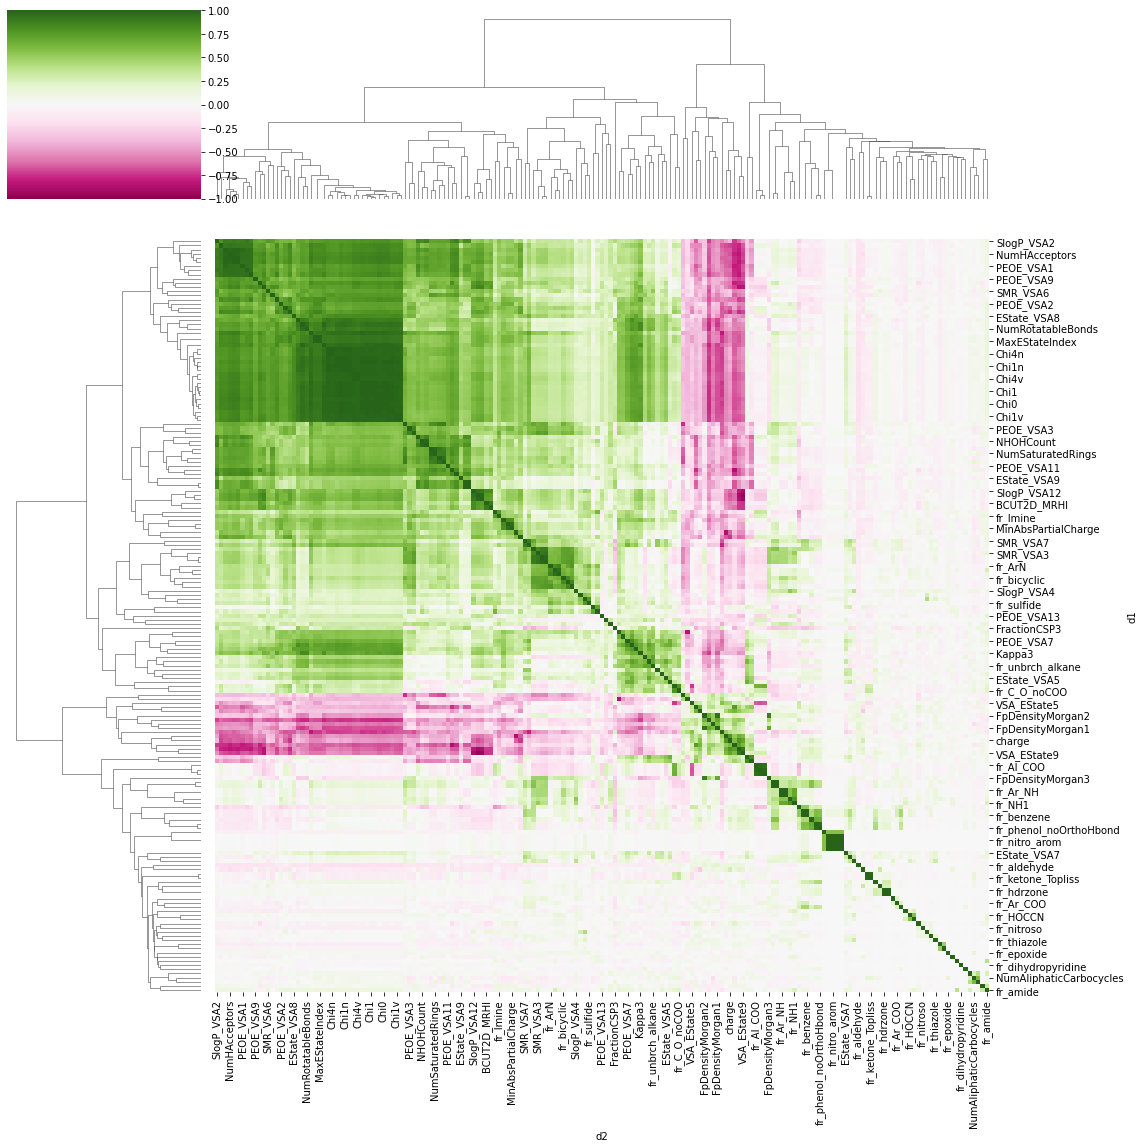

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.clustermap(df_3, vmin=-1, vmax=1, col_cluster=False, cmap='PiYG', figsize=(16,16))
sns.clustermap(df_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))
plt.tight_layout()
plt.show()

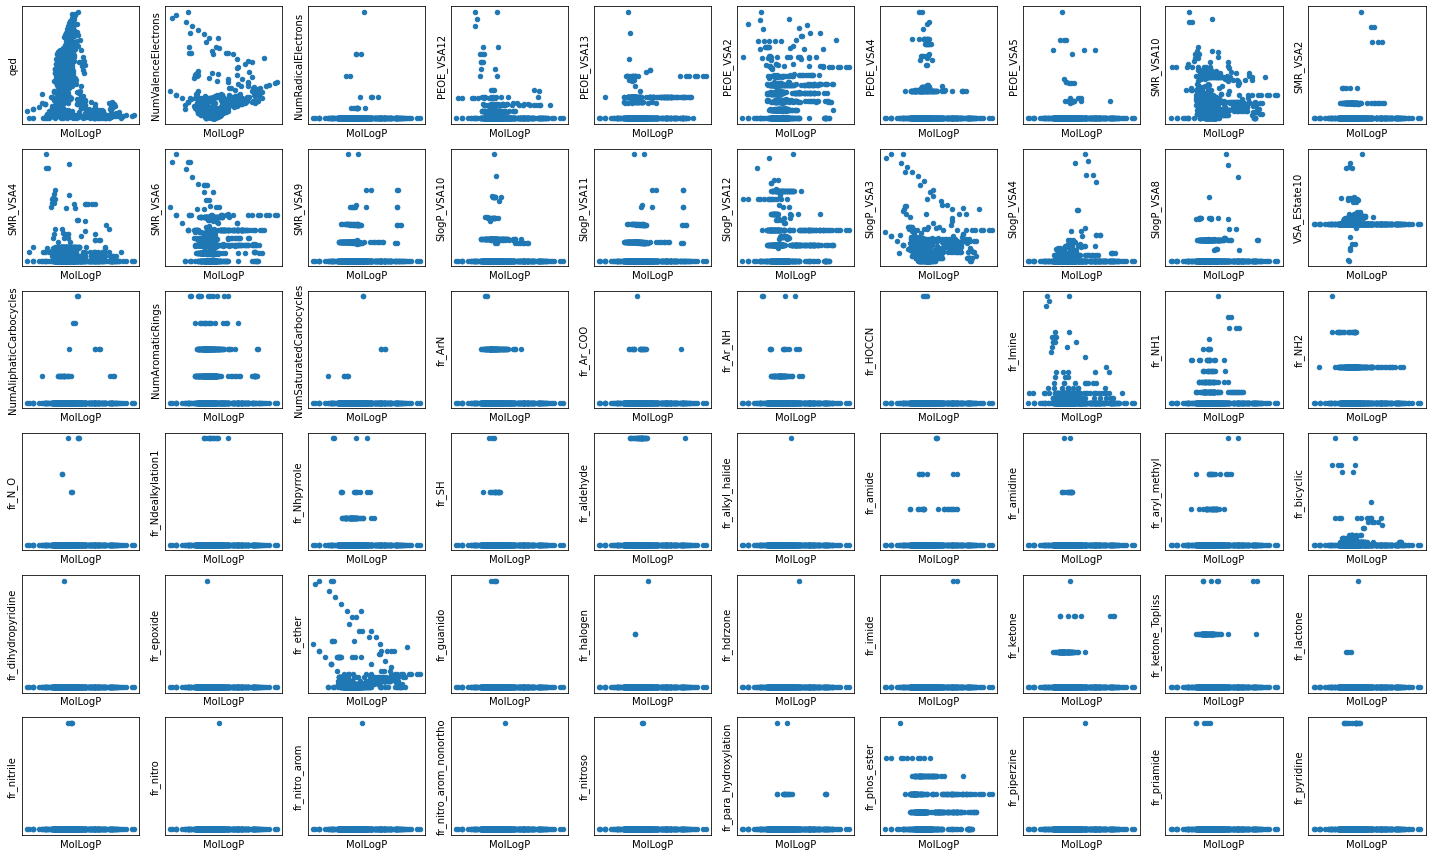

In [19]:
import matplotlib.pyplot as plt
lowest = df_2.query("abs(value) < 0.1 and d1 < d2")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)

f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    df.plot.scatter(lowest.iloc[i,0], lowest.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

In [20]:
# remove all columns that have less than 90% of non-zero entries
df = df.loc[:,((df != 0).sum() > df.shape[0] * 0.9)]

#  Hide

In [59]:
from scipy.stats import spearmanr
# correlation = [(d1, d2, spearmanr(dfCore.loc[:,d1], dfCore.loc[:,d2])[0]) for d1 in dfCore.columns for d2 in dfCore.columns]
correlation1515 = [(d1_1515, d2_1515, spearmanr(df1515.loc[:,d1_1515], df1515.loc[:,d2_1515])[0]) for d1_1515 in df1515.columns for d2_1515 in df1515.columns]


C:\Users\meide\.conda\envs\rdkit\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [61]:

from scipy.stats import spearmanr

correlation = [(d1, d2, spearmanr(dfcore.loc[:,d1], dfcore.loc[:,d2])[0]) for d1 in dfcore.columns for d2 in dfcore.columns]


In [16]:
from scipy.stats import spearmanr
correlation1515_PCA = [(d1_1515_PCA, d2_1515_PCA, spearmanr(df1515_PCA.loc[:,d1_1515_PCA], df1515_PCA.loc[:,d2_1515_PCA])[0]) for d1_1515_PCA in df1515_PCA.columns for d2_1515_PCA in df1515_PCA.columns]


In [9]:
#dfcore_2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])
#df1515_2 = pd.DataFrame(correlation1515, columns =["d1_1515", "d2_1515","value1515"])


df_2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])

In [17]:
df1515_PCA_2 = pd.DataFrame(correlation1515_PCA, columns =["d1_1515_PCA", "d2_1515_PCA", "value1515_PCA"])

In [10]:
#dfcore_3 = dfcore_2.pivot_table(index='d1', columns='d2', values='value')
# df1515_3 = df1515_2.pivot_table(index ="d1_1515", columns = "d2_1515", values = "value1515")


df_3 = df_2.pivot_table(index='d1', columns='d2', values='value')

In [18]:
df1515_PCA_3 = df1515_PCA_2.pivot_table(index ="d1_1515_PCA", columns = "d2_1515_PCA", values = "value1515_PCA")

In [20]:
import seaborn as sns

### SNS clustermap

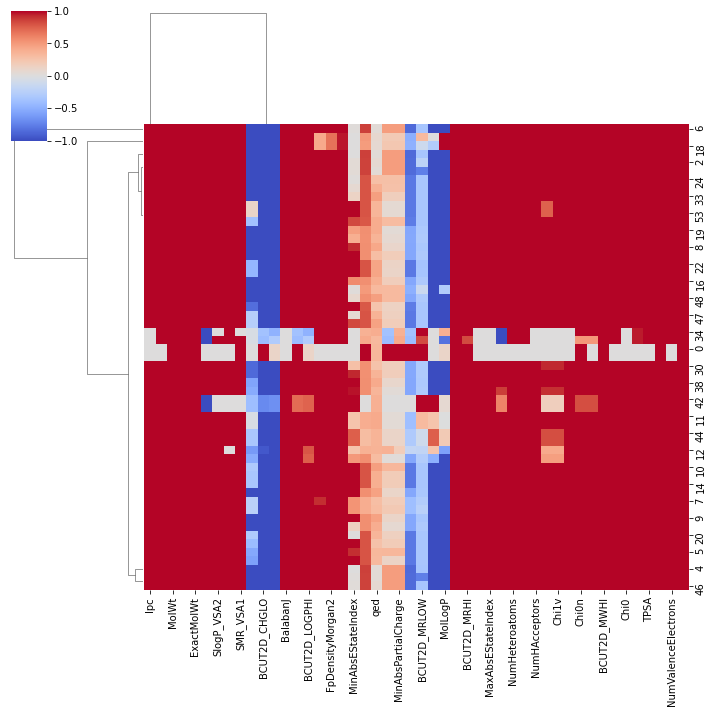

In [27]:
sns.clustermap(df1515_PCA,vmin = -1, vmax = 1, cmap = "coolwarm")

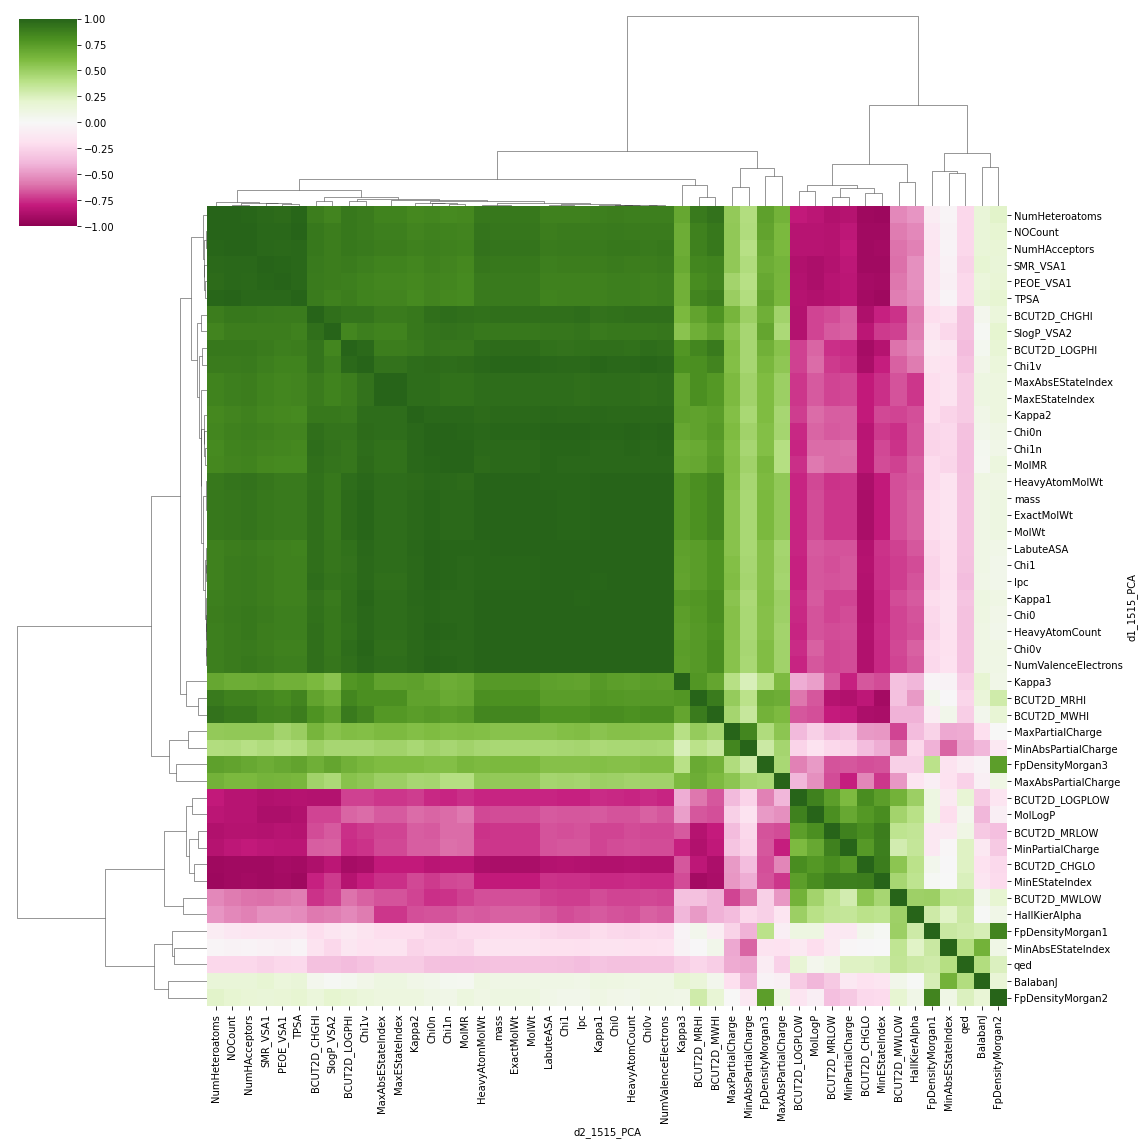

In [21]:
sns.clustermap(df1515_PCA_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

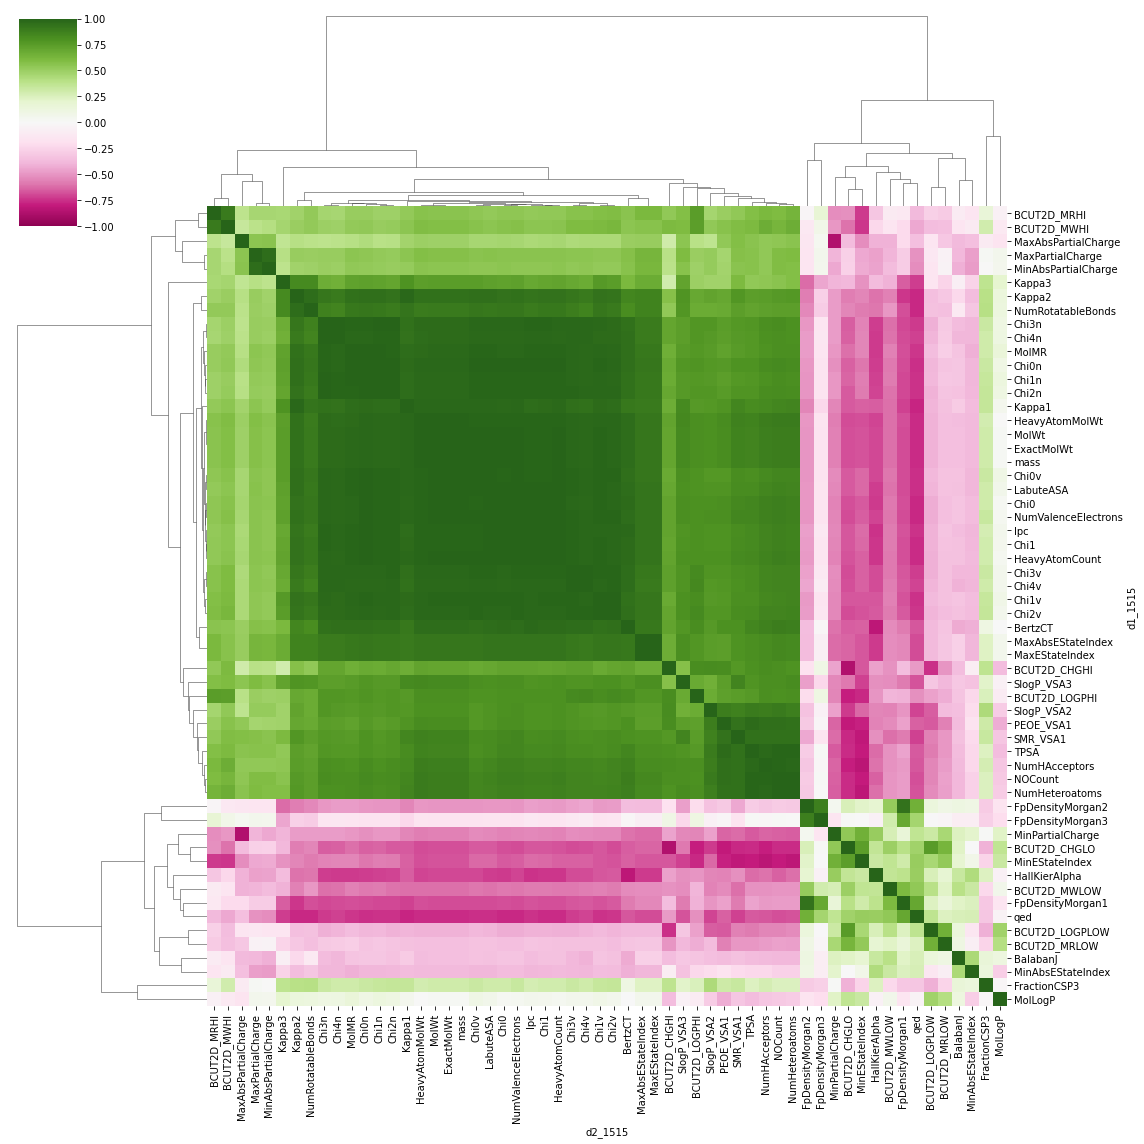

In [51]:
import seaborn as sns
sns_plot = sns.clustermap(df1515_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

sns_plot.savefig(f"Seaborn/1515_pre-pruned_descriptors_clustermap.png")
sns_plot.savefig(f"Seaborn/1515_pre-pruned_descriptors_clustermap.svg")


AttributeError: 'QuadMesh' object has no property 'xlabel'

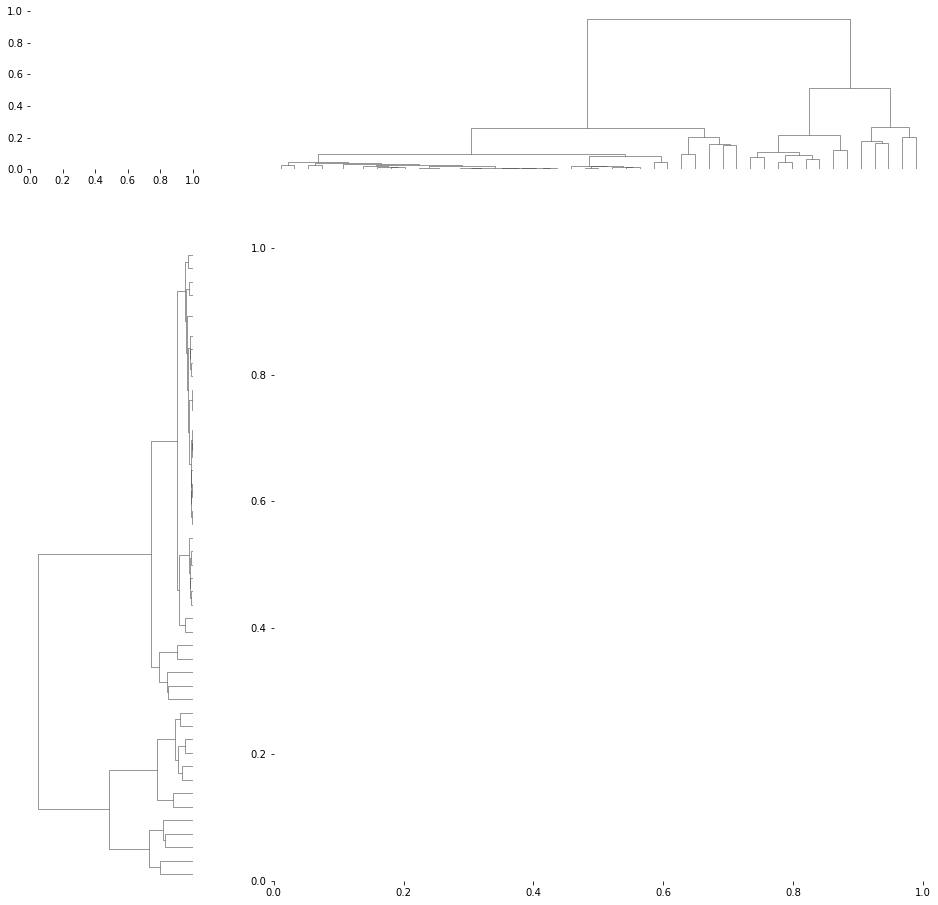

In [67]:
import seaborn as sns
sns_plot = sns.clustermap(dfcore_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16),xlabel="", ylabel ="")

sns_plot.savefig(f"Seaborn/core_pruned_descriptors_clustermap.png")
sns_plot.savefig(f"Seaborn/core_pruned_descriptors_clustermap.svg")


### Heatmap plot

<AxesSubplot:xlabel='d2_1515_PCA', ylabel='d1_1515_PCA'>

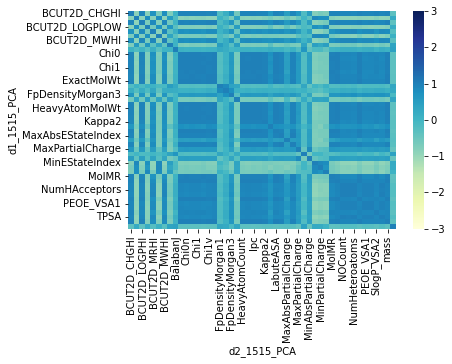

In [26]:
sns.heatmap(df1515_PCA_3,vmin=-3, vmax=3, annot = False, cmap ="YlGnBu")

<AxesSubplot:xlabel='d2', ylabel='d1'>

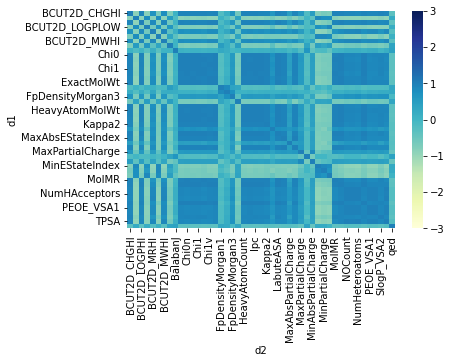

In [66]:
sns.heatmap(dfcore_3,vmin=-3, vmax=3, annot = False, cmap ="YlGnBu")

In [22]:
sns.pairplot(data =df1515_PCA_3)

KeyboardInterrupt: 

In [16]:
sns.clustermap(df1515_3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

NameError: name 'df1515_3' is not defined

#### Do scatter plots for pairs of features with low correlation

In [98]:
# lowest = dfCore_2.query("abs(value) < 0.1 and d1 < d2")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)
lowest_1515 = df1515_2.query("abs(value1515) < 0.1 and d1_1515 < d2_1515")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)

NameError: name 'dfCore' is not defined

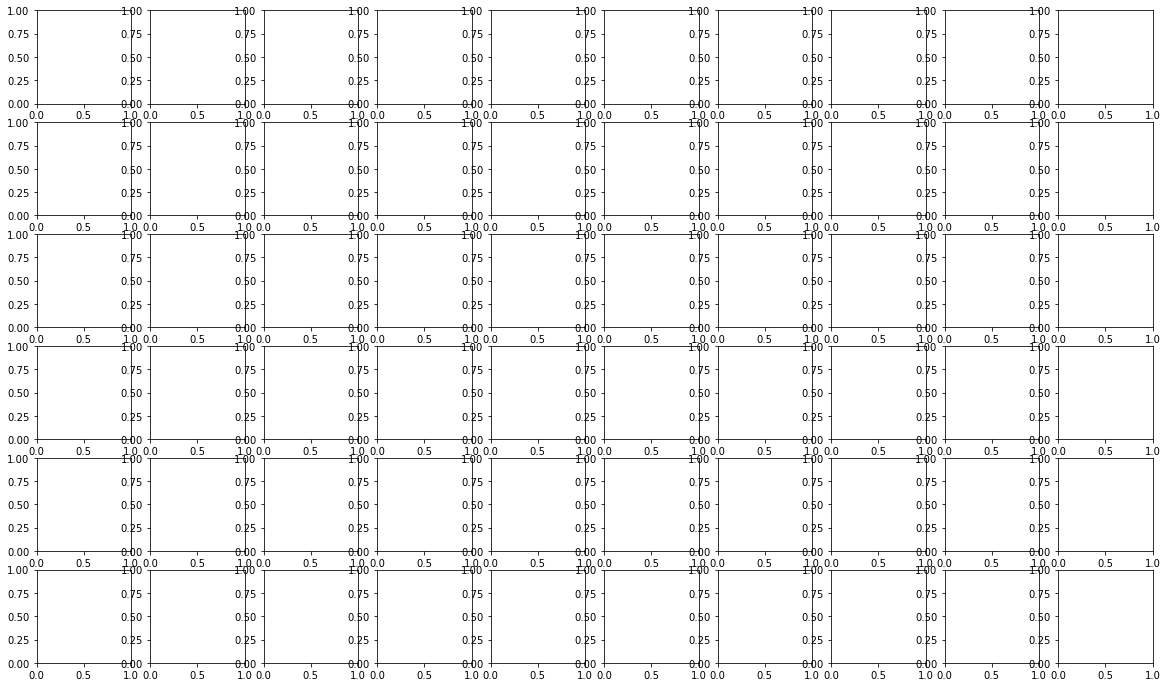

In [99]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    dfCore.plot.scatter(lowest.iloc[i,0], lowest.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

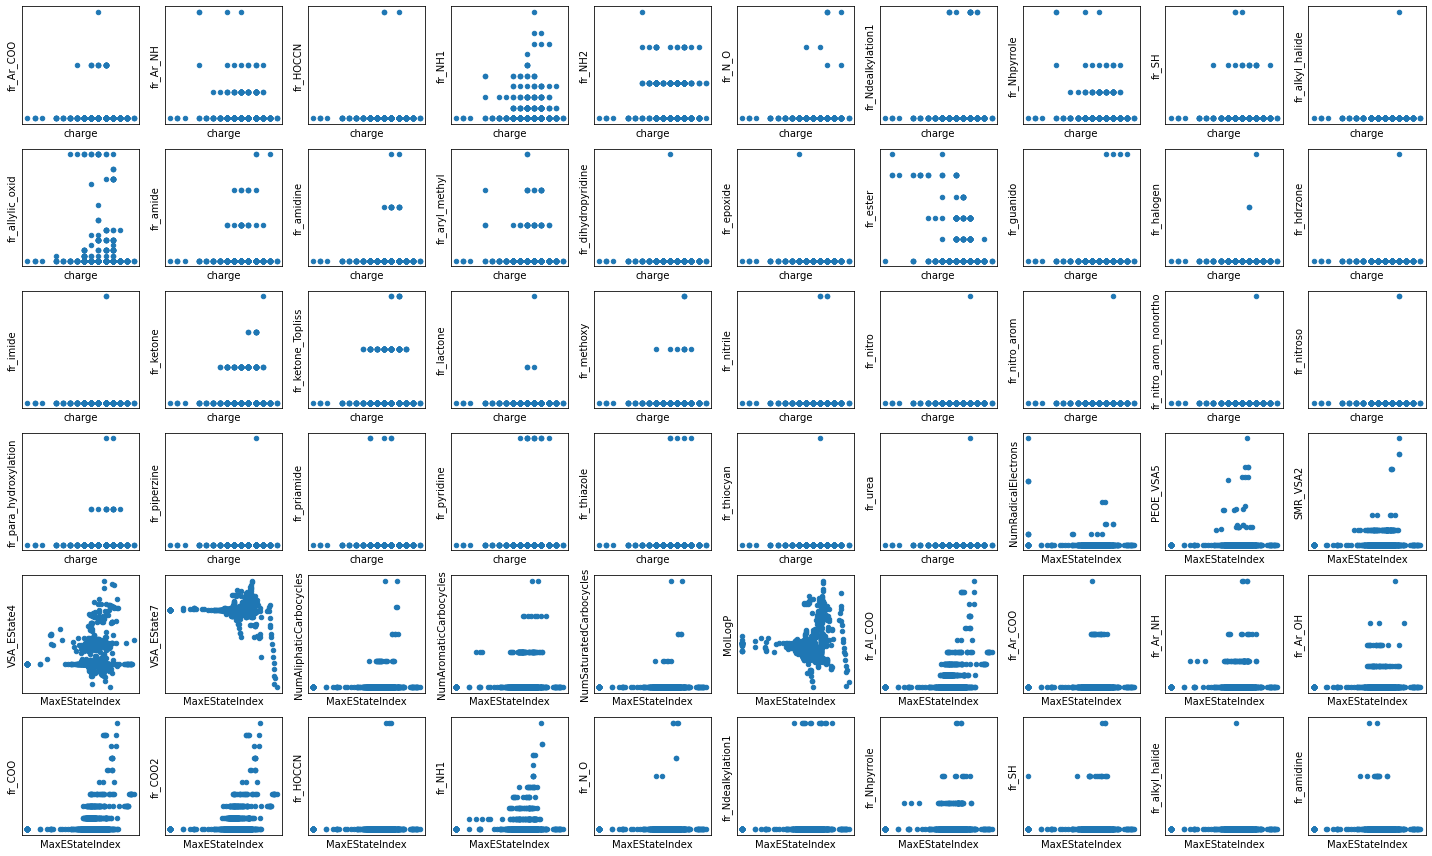

In [100]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    df1515.plot.scatter(lowest_1515.iloc[i,0], lowest_1515.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()

In [18]:
import pyvis as pv
from pyvis.network import Network
import networkx as nx
from tqdm.auto import tqdm
from matplotlib import cm, colors
from IPython.display import IFrame

In [19]:
net = Network(height ="750px", width ="100%", bgcolor="#222222", font_color= "white")
net.barnes_hut()


In [20]:
dfCorr = df1515_3.corr()

In [21]:
# edges = pd

### Stuff

In [22]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
got_net.barnes_hut(overlap = 0.9)
got_data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.toggle_physics(False)
got_net.show_buttons(filter_=['physics'])
got_net.show('gameofthrones.html')

## Pyvis stuff

In [23]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# set the physics layout of the network
net2.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=250, spring_strength=0.001, damping=0.09, overlap=0)
data = df1515_2

sources = data["d1_1515"]
targets = data['d2_1515']
weights = data['value1515']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    net2.add_node(src, src, title=src)
    net2.add_node(dst, dst, title=dst)
    net2.add_edge(src, dst, value=w)

neighbor_map = net2.get_adj_list()

# add neighbor data to node hover data
for node in net2.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

net2.toggle_physics(False)
net2.show_buttons(filter_=['physics'])
net2.show('Metabolic_network.html')


# NetworkX & removal of self-loops

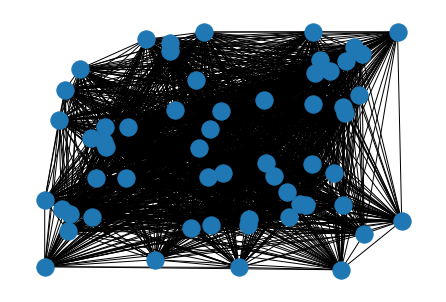

In [24]:
import networkx as nx
import numpy as np


net3 = nx.Graph()
net3 = nx.from_pandas_edgelist(df1515_2, source ="d1_1515", target = "d2_1515", edge_attr = "value1515")

#Remove self loops
net3.remove_edges_from(nx.selfloop_edges(net3))

nx.draw_random(net3)

In [ ]:
import networkx as nx
import numpy as np
from pyvis.network import Network
# import pyvis.network as nt

# The network source is just
net4 = nx.Graph()
net4 = nx.from_pandas_edgelist(dfNetwork, source ="#ID", target = "mass", edge_attr = True)

net4.remove_edges_from(nx.selfloop_edges(net4))

nx.draw_circular(net4)

Network.from_nx
Network.from_nx(nx_Graph())
Network.show('nx.html')

# Adding nodes with attributes
- 1. One approach is to create lists from columns from each dataframe and then parse them as values in the script below
   - haha fml pyvis does not support df's, lists or series 🪦🪦🪦🪦🪦🪦

- 2. Create the network in networkX and import it to pyvis via from_nx

   ```python
      import networkx as nx
      import pyvis.network as network

      nx_graph = nx.cycle_graph(10)
      
      network.from_nx(nx_graph)
    ```
   


# NetworkX prepping before pyvis

In [ ]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(120)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
Testing = nt.from_nx(nx_graph)
nt.show('nx.html')

# Don't open 